In [1]:
# For reading the dataset and creating the dataframe
import pandas as pd
import numpy as np
#Visualization Phase
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Loading the files
anime_df=pd.read_csv('Anime.csv')
rating_df=pd.read_csv('Rating.csv')

In [3]:
#merging the dataframes based on the anime id
anime=pd.merge(anime_df,rating_df,on='anime_id',suffixes= ['', '_user'])
anime

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [4]:
#renanming column name
anime = anime.rename(columns={'rating_user': 'user_rating'})
anime.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [5]:
# Creating a dataframe for rating counts
combine_anime_rating = anime.dropna(axis = 0, subset = ['name'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['name'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['name', 'user_rating']]
    )

Text(0, 0.5, 'User Rating count')

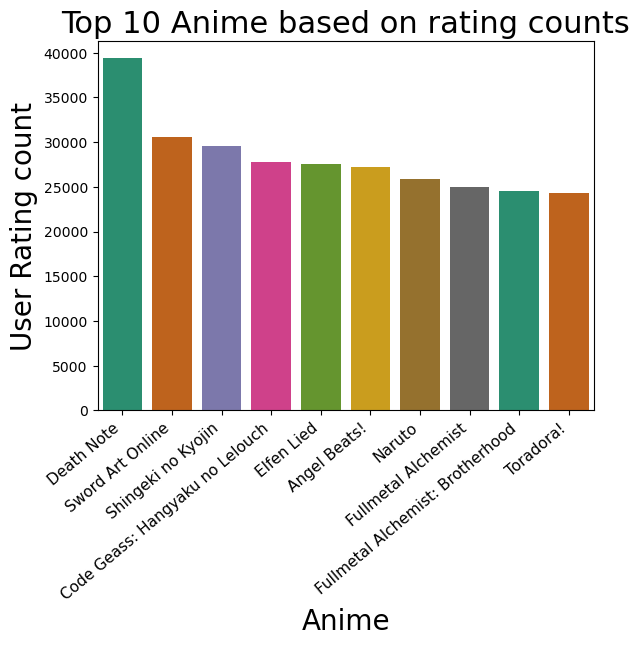

In [6]:
#plotting the top 10 rated animes
top10_animerating=anime_ratingCount[['name', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="name", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

In [7]:
anime = anime.merge(anime_ratingCount, left_on = 'name', right_on = 'name', how = 'left')
anime = anime.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})

In [8]:
duplicate_anime=anime.copy()
duplicate_anime.drop_duplicates(subset ="name", keep = 'first', inplace = True)

Text(0, 0.5, 'Community Size')

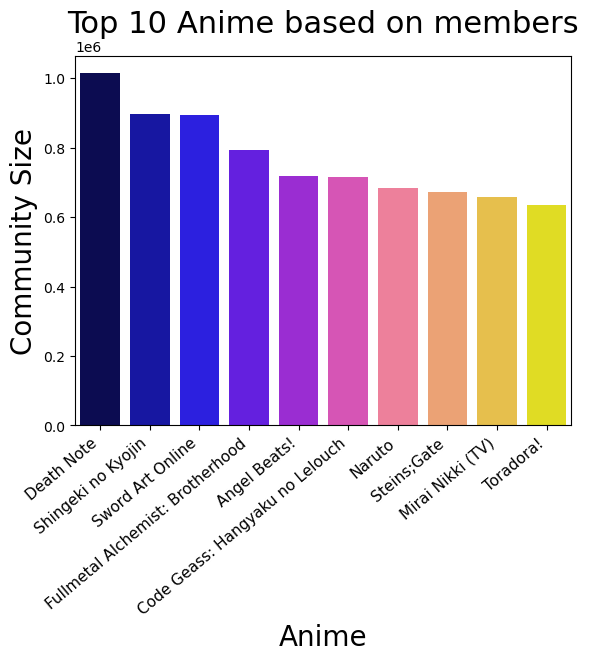

In [9]:
#plotting graph to show top 10 animes based on members
top10_animemembers=duplicate_anime[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="name", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

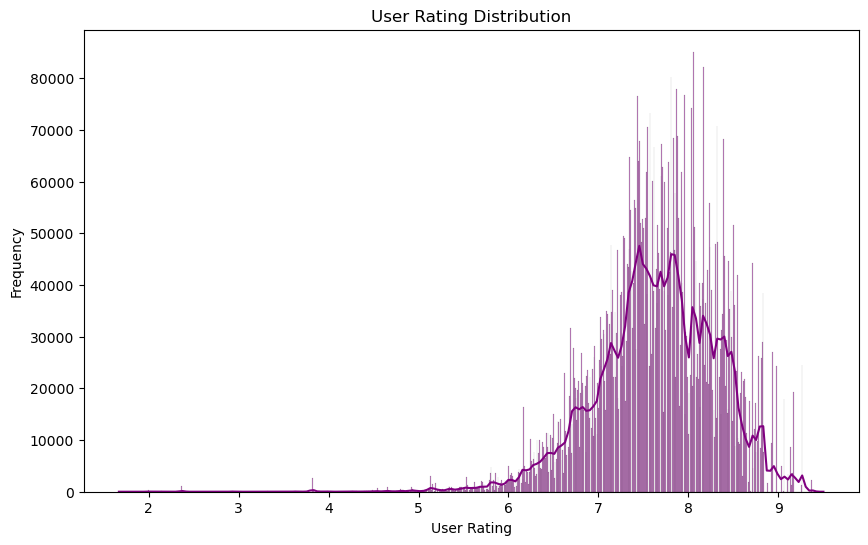

In [10]:
# User Rating Distribution Visualization
plt.figure(figsize=(10, 6))
sns.histplot(anime['rating'], kde=True, color='purple')
plt.title('User Rating Distribution')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

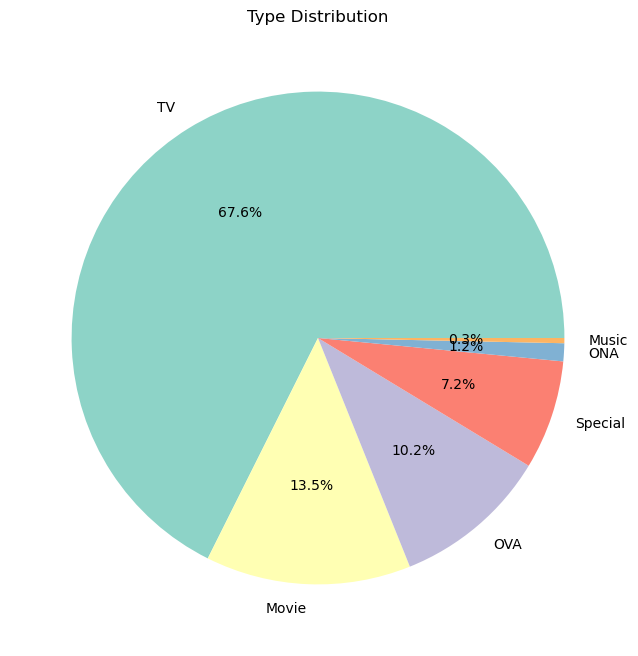

In [11]:
# Type Distribution Visualization
plt.figure(figsize=(8, 8))
type_counts = anime['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Type Distribution')
plt.show()

C:\Users\jibin\AppData\Local\Temp\ipykernel_24496\2388259499.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = anime.corr()


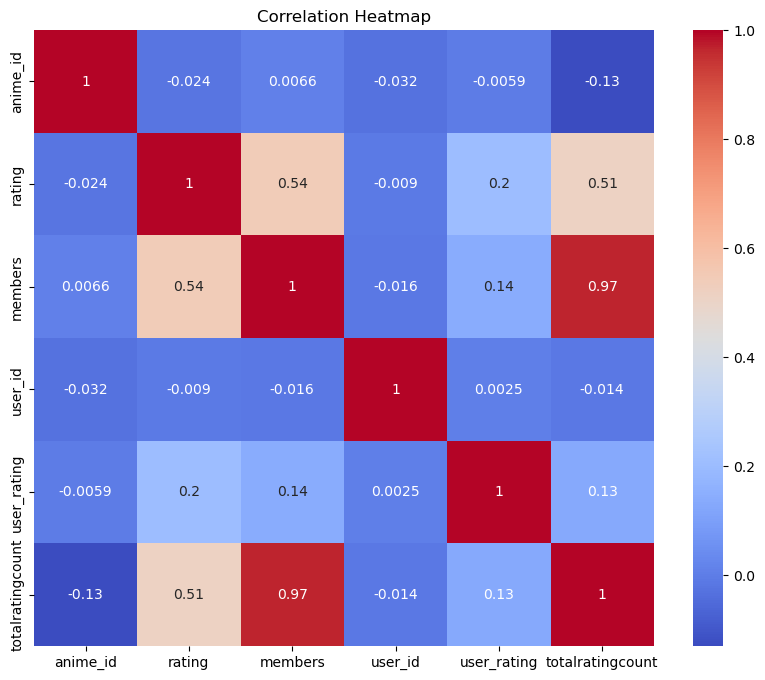

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = anime.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

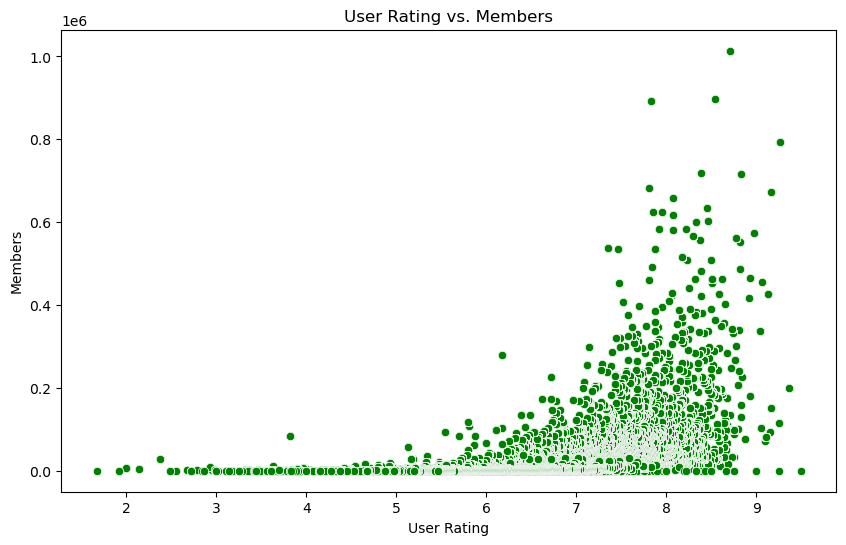

In [13]:
# User Rating vs. Members Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='members', data=anime, color='green')
plt.title('User Rating vs. Members')
plt.xlabel('User Rating')
plt.ylabel('Members')
plt.show()

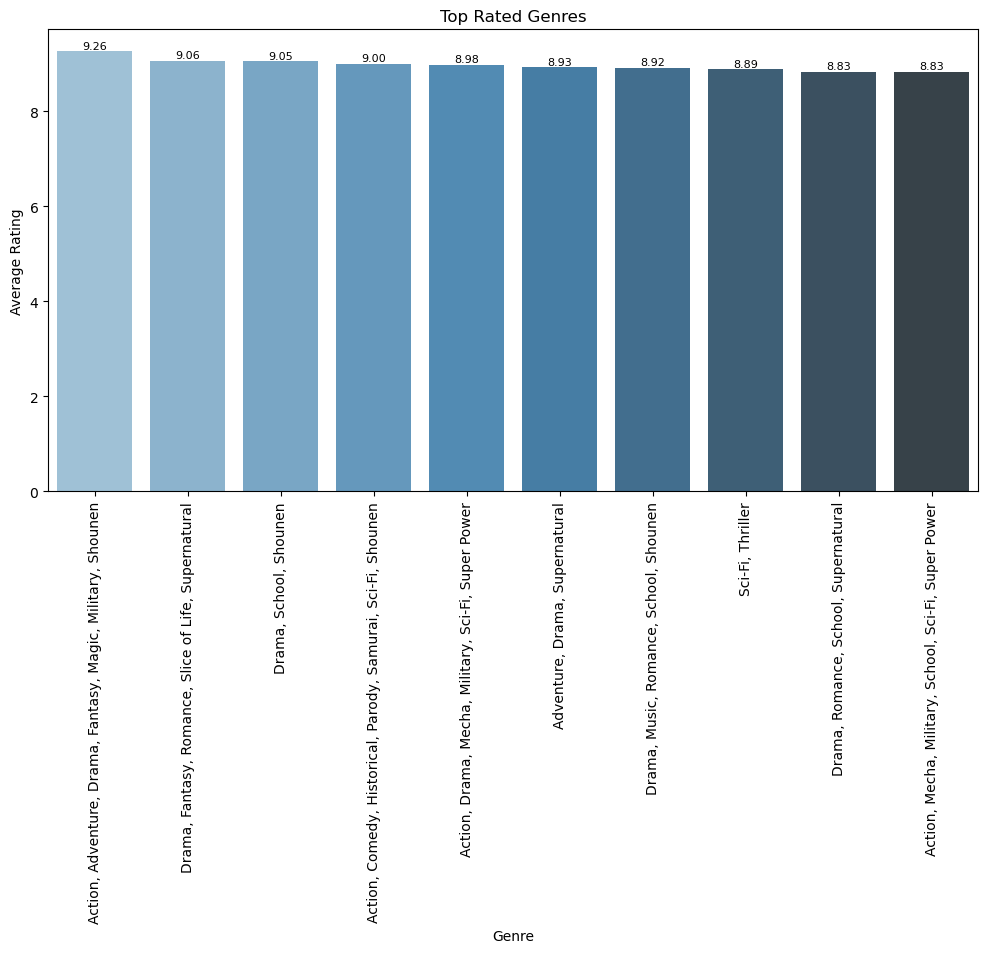

In [14]:
# Top Rated Genres
top_rated_genres = anime.groupby('genre')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_rated_genres.index, y=top_rated_genres.values, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Top Rated Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')

# Adding data labels to the bars
for i, v in enumerate(top_rated_genres.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()


Before proceeding, it is important to deal with NaN (Not a Number) values. Since the ratings are central to the system, users who have not provided any ratings are not useful to the engine. Therefore, we need to remove and eliminate those NaN values.

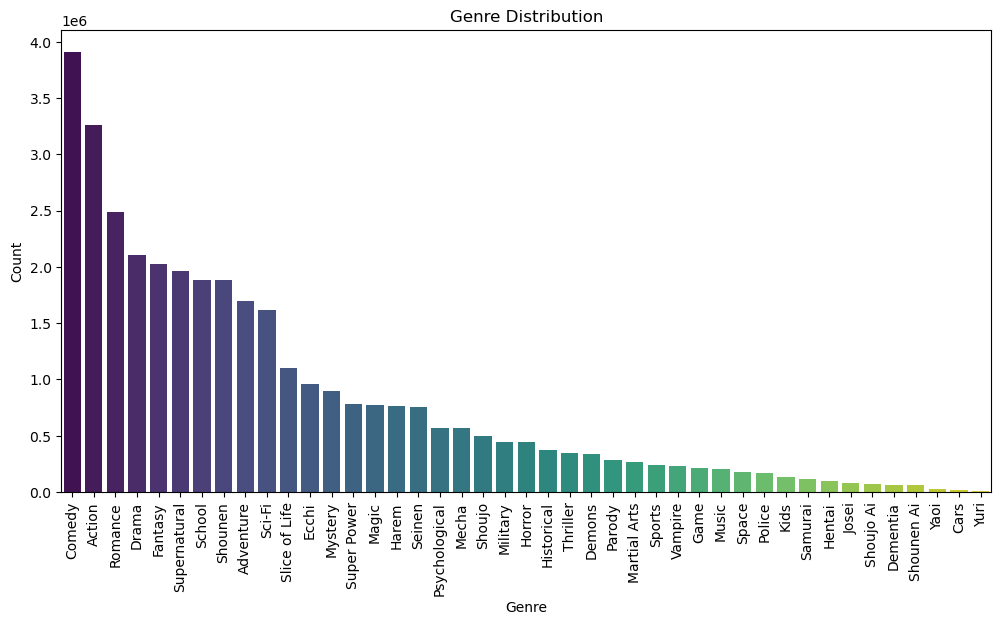

In [15]:
# Genre Distribution Visualization
plt.figure(figsize=(12, 6))
genre_counts = anime['genre'].str.split(', ').explode().value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [16]:
anime_feature=anime.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN,2199


In [17]:
# This code drops all rows with NaN (Not a Number) values from the DataFrame "anime_feature" along the 0-axis, which corresponds to rows. 
#The parameter "how='any'" specifies that if any NaN values are present in a row, the entire row should be dropped. 
# Therefore, after executing this code, all rows with NaN values will be removed from the "anime_feature" DataFrame.
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

anime_id            0
name                0
genre               0
type                0
episodes            0
rating              0
members             0
user_id             0
user_rating         0
totalratingcount    0
dtype: int64

Some users have only provided one rating, and even if it is a high rating, it may not be sufficient to provide valuable recommendations. To address this, a threshold value of 200 ratings has been set as a minimum requirement for a user's ratings to be considered. This threshold value can be adjusted to optimize the results, but the current value has been effective in achieving satisfactory outcomes.

In [18]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

The Pivot Dojo is a table where the rows represent titles and the columns represent user IDs. This format allows us to create a sparse matrix, which is useful for calculating cosine similarity between the titles and users.

In [19]:
anime_pivot=anime_feature.pivot_table(index='name',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Recommendation building phase 

In [20]:
from scipy.sparse import csr_matrix
anime_mtrx = csr_matrix(anime_pivot.values)
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_mtrx)

NearestNeighbors(algorithm='brute', metric='cosine')

In [21]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

4272


In [22]:
#Clearing the symbols and unwanted things from the title
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_df['name'] = anime_df['name'].apply(text_cleaning)

In [23]:
# #Term Frequency (TF) and Inverse Document Frequency (IDF)
# TF (Term Frequency) refers to the frequency of a word appearing in a particular document. 
# IDF (Inverse Document Frequency) is the inverse of the document frequency among all the documents in a corpus. 
# The TF-IDF (Term Frequency-Inverse Document Frequency) is commonly used for two reasons. 
# Firstly, when we search for a particular term, such as "the rise of analytics" on Google, 
# it is likely that the word "the" will appear more frequently than "analytics", but the latter is more important in terms of the search query. 
# Therefore, TF-IDF weighting helps to mitigate the effect of high frequency words in determining the importance of a document.

from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_df['genre'] = anime_df['genre'].fillna('')
genres_str = anime_df['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [24]:
tfv_matrix.shape

(12294, 1554)

In [25]:
# Scikit-learn offers pairwise metrics, also known as kernels in machine learning terminology, 
# that are suitable for both dense and sparse vector representations of data. 
# In this case, we want to assign a value of 1 for recommended anime and 0 for non-recommended anime. 
# To accomplish this, we are utilizing the sigmoid kernel.

from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [26]:
indices = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates()

In [27]:
def similar(title, sig=sig):
    # Convert the title to lowercase
    
    try:
        # Get the index corresponding to title
        idx = indices[title]

        # Get the pairwise similarity scores 
        sig_scores = list(enumerate(sig[idx]))

        # Sort the anime 
        sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

        # Scores of the 10 most similar anime
        sig_scores = sig_scores[1:11]

        # Anime indices
        anime_indices = [i[0] for i in sig_scores]

        # returns 10 most similar anime
        return pd.DataFrame({'Anime name': anime_df['name'].iloc[anime_indices].values,
                                     'Rating': anime_df['rating'].iloc[anime_indices].values,'Type': anime_df['type'].iloc[anime_indices].values,'Genre': anime_df['genre'].iloc[anime_indices].values})
    except:
        print("Sorry, the anime you are searching for is not in the database")


In [28]:
similar("Naruto")

,Anime name,Rating,Type,Genre
0,Naruto: Shippuuden,7.94,TV,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Naruto,7.81,TV,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68,Special,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto x UT,7.58,OVA,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53,Movie,"Action, Comedy, Martial Arts, Shounen, Super P..."
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50,Movie,"Action, Comedy, Martial Arts, Shounen, Super P..."
6,Naruto Shippuuden: Sunny Side Battle,7.26,Special,"Action, Comedy, Martial Arts, Shounen, Super P..."
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11,Movie,"Action, Comedy, Martial Arts, Shounen, Super P..."
8,Battle Spirits: Ryuuko no Ken,4.89,OVA,"Action, Comedy, Martial Arts, Shounen"
9,Kyutai Panic Adventure!,5.21,Special,"Action, Martial Arts, Shounen, Super Power"


In [29]:
similar("Edens Zero")

Sorry, the anime you are searching for is not in the database


In [30]:
similar("Death Note")

,Anime name,Rating,Type,Genre
0,Death Note Rewrite,7.84,Special,"Mystery, Police, Psychological, Supernatural, ..."
1,Mousou Dairinin,7.74,TV,"Drama, Mystery, Police, Psychological, Superna..."
2,Higurashi no Naku Koro ni Kai,8.41,TV,"Mystery, Psychological, Supernatural, Thriller"
3,Higurashi no Naku Koro ni Rei,7.56,OVA,"Comedy, Mystery, Psychological, Supernatural, ..."
4,Bloody Night,4.26,ONA,"Horror, Psychological, Supernatural, Thriller"
5,Higurashi no Naku Koro ni,8.17,TV,"Horror, Mystery, Psychological, Supernatural, ..."
6,Shigofumi,7.62,TV,"Drama, Fantasy, Psychological, Supernatural, T..."
7,Himitsu: The Revelation,7.42,TV,"Mystery, Police, Psychological, Sci-Fi, Shoujo"
8,Monster,8.72,TV,"Drama, Horror, Mystery, Police, Psychological,..."
9,Hikari to Mizu no Daphne,6.87,TV,"Comedy, Drama, Mystery, Police, Psychological,..."
